<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Nelder-Mead



# Imports
<hr style="border:2px solid black"> </hr>

In [1]:
from scipy.optimize import minimize
from numpy.random import rand
from numpy import exp, arange, sqrt, cos, e, pi, meshgrid
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

# Objective fnction
<hr style="border:2px solid black"> </hr>


- The **Ackley function** is a two-dimensional objective function that has a global optima at `[0,0]` but has many local optima.
- Local methods such as **Nelder-Mead** can get stuck in search of the local optima.



In [2]:
# objective function
def objective(x, y):
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

In [3]:
def objective_scipy(v):
    """
    This is just a callable version of the same function
    Scipy passes a single value and then we'll unpack it
    internally
    """
    x, y = v
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

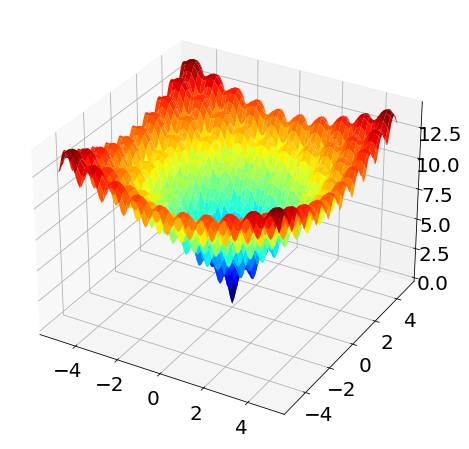

In [4]:
# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)


# 3D plotting
rcParams['figure.figsize'] = 17, 8
rcParams['font.size'] = 20
figure = plt.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
plt.show()

# Find the minimum
<hr style="border:2px solid black"> </hr>


- Local methods such as **Nelder-Mead** can get stuck in search of the local optima.
- Each time we run the example, we will find a different local optima because we are randomly starting the iteration.



In [5]:
# define range for input
r_min, r_max = -5.0, 5.0
# define the starting point as a random sample from the domain
pt = r_min + rand(2) * (r_max - r_min)
# perform the search
result = minimize(objective_scipy, pt, method='nelder-mead')
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = objective_scipy(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : Optimization terminated successfully.
Total Evaluations: 56
Solution: f([ 3.97893205 -2.98424849]) = 10.12035


# References
<hr style="border:2px solid black"> </hr>


- https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#nelder-mead-simplex-algorithm-method-nelder-mead
- https://machinelearningmastery.com/how-to-use-nelder-mead-optimization-in-python/

